In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/1017.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/4803.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/5106.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/3765.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/780.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/3952.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/227.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/2731.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/579.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/353.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/Wi

# Table of Content

1. **Installing Requirements**
2. **Loading The Data.**
3. **CascadeClassifier**
4. **Data Agumentation**
5. **Build Model and Train**
6. **Evaluate**
7. **Ploting Loss and Accuracy**
8. **Predict for Single Image**
    * **Crop & Reshape Image**
    * **predict**
    * **plot**



# **Installing Requirements**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from scipy.spatial import distance
import matplotlib.pyplot as plt

from keras.applications.vgg19 import VGG19,preprocess_input
from keras import Sequential
from keras.layers import Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator

# **Loading The Data**

In [3]:
train_dir = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Train'
test_dir = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Test'
val_dir = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation'

# **CascadeClassifier**

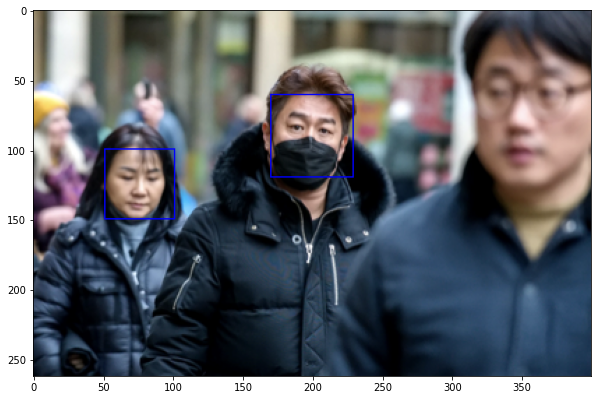

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def face_detector(face_image_path):
    face_model = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_alt.xml")
    img = cv2.imread(face_image_path)
    img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    img_color = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    faces = face_model.detectMultiScale3(img, minNeighbors=6,outputRejectLevels =True)
    faces_probs = sigmoid(faces[-1])
    for i,d in enumerate(faces[0]):
        (x,y,w,h) = d
        if faces_probs[i]>0.95:
            cv2.rectangle(img_color,(x,y),(x+w,y+h),(0,0,255),1)
    plt.figure(figsize=(10,10))
    plt.imshow(img_color)

    
face_detector("../input/face-mask-detection/images/maksssksksss244.png")

# **Data Agumentation**

In [5]:
def data_agument(train_dir,val_dir,test_dir,target_size_ = (128,128),zoom_range_ = 0.2,shear_range_=0.2,batch_size_ = 32,class_mode_ = 'binary'):
    train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=zoom_range_,shear_range=shear_range_)
    train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=target_size_,class_mode='binary',batch_size=batch_size_)

    val_datagen = ImageDataGenerator(rescale=1.0/255)
    val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=target_size_,class_mode=class_mode_,batch_size=batch_size_)

    test_datagen = ImageDataGenerator(rescale=1.0/255)
    test_generator = train_datagen.flow_from_directory(directory=test_dir,target_size=target_size_,class_mode=class_mode_,batch_size=batch_size_)
    return train_generator,val_generator,test_generator
train_gen,val_gen,test_gen = data_agument(train_dir,val_dir,test_dir)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


# **Build Model and Train**

In [6]:
def build_train_model(train_generator,test_generator,val_generator,epoch = 25):
    vgg19 = VGG19(weights = 'imagenet',include_top = False,input_shape = (128,128,3))
    for layer in vgg19.layers:
        layer.trainable = False

    model = Sequential()
    model.add(vgg19)
    model.add(Flatten())
    model.add(Dense(1,activation = 'sigmoid'))
    model.summary()

    model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

    history = model.fit_generator(generator=train_generator,
                                  steps_per_epoch=len(train_generator)//32,
                                  epochs=epoch,validation_data=val_generator,
                                  validation_steps=len(val_generator)//32)
    model.save('masknet.h5')
    return history,model
history,model = build_train_model(train_gen,test_gen,test_gen)


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

80150528/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 8193      
Total params: 20,032,577
Trainable params: 8,193
Non-trainable params: 20,024,384
_________________________________________________________________


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-01-24 09:17:57.562122: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
9/9 [==============================] - 34s 4s/step - loss: 0.5586 - accuracy: 0.7188
Epoch 2/25
9/9 [==============================] - 32s 4s/step - loss: 0.3220 - accuracy: 0.8785
Epoch 3/25
9/9 [==============================] - 33s 4s/step - loss: 0.2301 - accuracy: 0.9097
Epoch 4/25
9/9 [==============================] - 32s 4s/step - loss: 0.1898 - accuracy: 0.9271
Epoch 5/25
9/9 [==============================] - 32s 4s/step - loss: 0.1393 - accuracy: 0.9583
Epoch 6/25
9/9 [==============================] - 33s 4s/step - loss: 0.1339 - accuracy: 0.9618
Epoch 7/25
9/9 [==============================] - 32s 4s/step - loss: 0.1321 - accuracy: 0.9688
Epoch 8/25
9/9 [==============================] - 32s 4s/step - loss: 0.1171 - accuracy: 0.9618
Epoch 9/25
9/9 [==============================] - 32s 4s/step - loss: 0.1060 - accuracy: 0.9618
Epoch 10/25
9/9 [==============================] - 32s 4s/step - loss: 0.0809 - accuracy: 0.9757
Epoch 11/25
9/9 [======================

# **Evaluatation**

In [7]:
def evaluate(test_generator):
    accuracy = model.evaluate_generator(test_generator)
    print("VGG19 MODEL ACCURACY : "+ str(accuracy[1]))
    return accuracy
accuracy = evaluate(test_gen)    

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


VGG19 MODEL ACCURACY : 0.9818548560142517


# **Ploting Loss and Accuracy**

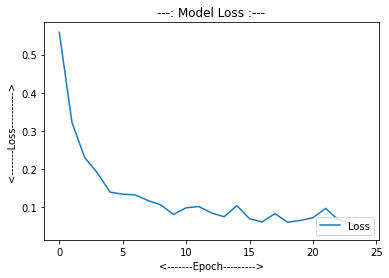

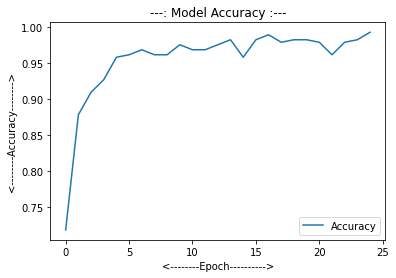

In [8]:
plt.plot(history.history['loss'])
plt.title('---: Model Loss :---')
plt.ylabel('<-------Loss---------->')
plt.xlabel('<-------Epoch--------->')
plt.legend(['Loss'], loc='lower right')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('---: Model Accuracy :---')
plt.ylabel('<--------Accuracy-------->')
plt.xlabel('<--------Epoch---------->')
plt.legend(['Accuracy'], loc='lower right')
plt.show()

# **Predict for Single Image**

[[170  63  56  56]
 [ 52 100  49  49]]
[55.07517341 57.28288254]
[1. 1.]


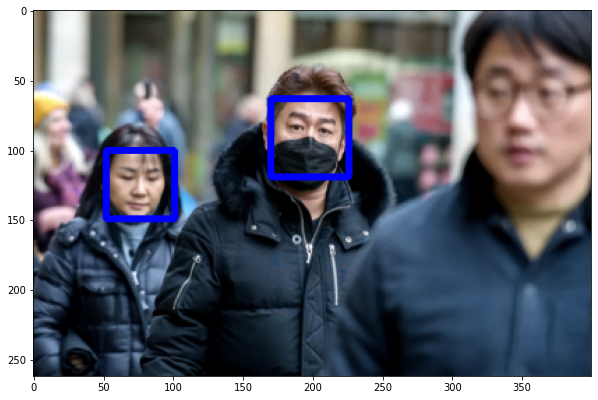

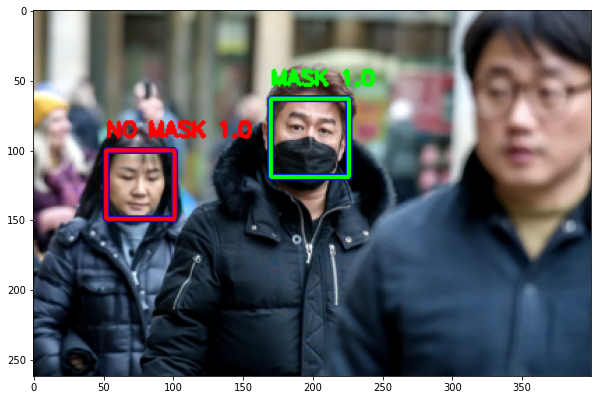

In [9]:
def predict(sample_img_path):
    mask_label = {0:'MASK',1:'NO MASK'}
    dist_label = {0:(0,255,0),1:(255,0,0)}
    face_model = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_alt2.xml")
    img = cv2.imread(sample_img_path)
    img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    img_color = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    faces = face_model.detectMultiScale3(img, minNeighbors=6,outputRejectLevels =True)
    print(faces[0])
    print(faces[-1])
    
    faces_probs = sigmoid(faces[-1])
    print(faces_probs)
    for i,d in enumerate(faces[0]):
        (x,y,w,h) = d
        if faces_probs[i]>0.95:
            cv2.rectangle(img_color,(x,y),(x+w,y+h),(0,0,255),4)
    plt.figure(figsize=(10,10))
    plt.imshow(img_color)
    plt.show()
    for i in range(len(faces[0])):
        if faces_probs[i]>0.95:
            (x,y,w,h) = faces[0][i]
            crop = img_color[y:y+h,x:x+w]
            crop = cv2.resize(crop,(128,128))
            crop = np.reshape(crop,[1,128,128,3])/255.0
            mask_result = model.predict(crop)
            #print(type(mask_result))
            #print(mask_result)
            cv2.putText(img_color,mask_label[np.round(mask_result[0][0])] +" "+ str(faces_probs[i]) ,(x, y-10),
            cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[np.round(mask_result[0][0])],2)
            cv2.rectangle(img_color,(x,y),(x+w,y+h),dist_label[np.round(mask_result[0][0])],2)
    plt.figure(figsize=(10,10))
    plt.imshow(img_color)
    plt.show()
predict("../input/face-mask-detection/images/maksssksksss244.png")

In [10]:
print("TATAL ACCURACY BY VGG19 MODEL : {} ".format(accuracy[1]))

TATAL ACCURACY BY VGG19 MODEL : 0.9818548560142517 
